In [17]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
cov=np.eye(2)
X0 = np.random.multivariate_normal(mean=[-1, -1], cov=cov, size=10)
y0 = np.zeros(10)
X1 = np.random.multivariate_normal(mean=[1, 1], cov=cov, size=10)
y1 = np.ones(10)

In [3]:
X = np.vstack([X0, X1])
y = np.hstack([y0, y1])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=42)

In [5]:
print("Train X shape:", X_train.shape)
print("Test X shape:", X_test.shape)

Train X shape: (10, 2)
Test X shape: (10, 2)


In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)

In [8]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [9]:
def train_nn(X, y, lr=0.1, epochs=1000):
    np.random.seed(42)
    n_samples = X.shape[0]

    # Initialize parameters
    W1 = np.random.randn(2, 1)  # Input to hidden (2 -> 1)
    b1 = np.random.randn(1)
    W2 = np.random.randn(1, 1)  # Hidden to output (1 -> 1)
    b2 = np.random.randn(1)

    losses = []

    for epoch in range(epochs):
        # Forward pass
        Z1 = X @ W1 + b1
        A1 = sigmoid(Z1)
        Z2 = A1 @ W2 + b2
        y_pred = Z2.reshape(-1)

        # Loss
        loss = mse(y, y_pred)
        losses.append(loss)

        # Backpropagation
        dZ2 = (y_pred - y).reshape(-1, 1)  # (N,1)
        dW2 = A1.T @ dZ2 / n_samples
        db2 = np.mean(dZ2)

        dA1 = dZ2 @ W2.T  # (N,1)
        dZ1 = dA1 * sigmoid_derivative(Z1)
        dW1 = X.T @ dZ1 / n_samples
        db1 = np.mean(dZ1)

        # Gradient descent update
        W2 -= lr * dW2
        b2 -= lr * db2
        W1 -= lr * dW1
        b1 -= lr * db1

    params = {
        "W1": W1, "b1": b1,
        "W2": W2, "b2": b2
    }
    return params, losses

In [10]:
def predict_nn(X, params):
  Z1 = X @ params["W1"] + params["b1"]
  A1 = sigmoid(Z1)
  Z2 = A1 @ params["W2"] + params["b2"]
  return Z2.reshape(-1)

In [15]:
params, losses = train_nn(X_train, y_train, lr=0.1, epochs=1000)
y_test_pred = predict_nn(X_test, params)
test_mse = mse(y_test, y_test_pred)

print(f"Test MSE: {test_mse:.4f}")

Test MSE: 0.0812


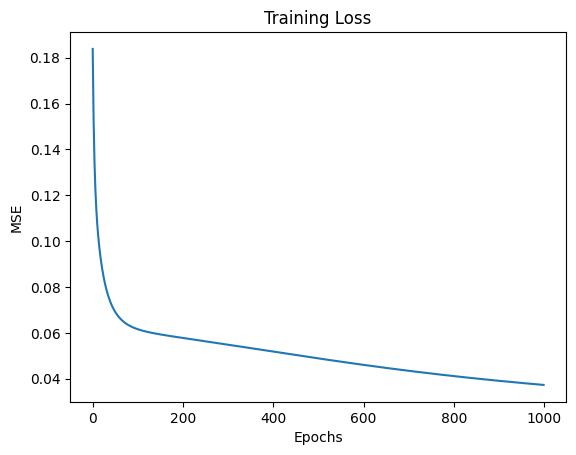

In [18]:
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.title("Training Loss")
plt.show()